In [166]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [322]:
df = pd.read_csv('titanic/train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [324]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [325]:
null_counts = df.isnull().sum()
null_counts

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [151]:
unique_counts = df.nunique()
unique_counts

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

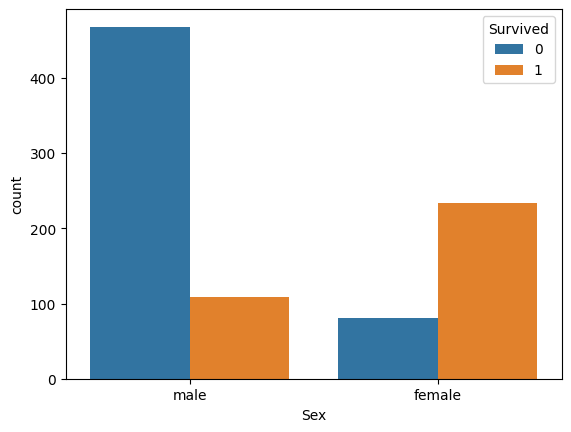

In [328]:
counts = df['Sex'].value_counts()
sns.countplot(data=df, x='Sex', hue='Survived')
plt.show()

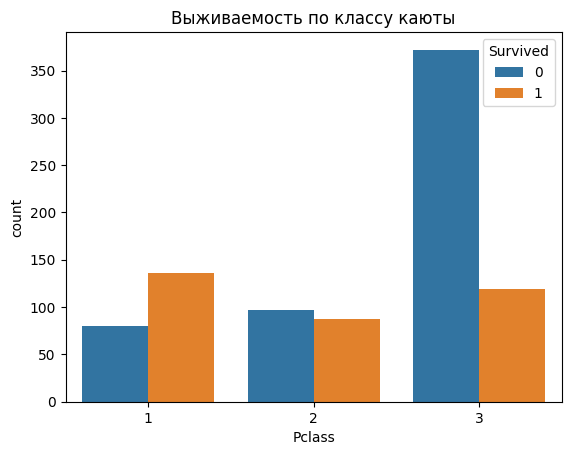

In [153]:
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title('Выживаемость по классу каюты')
plt.show()

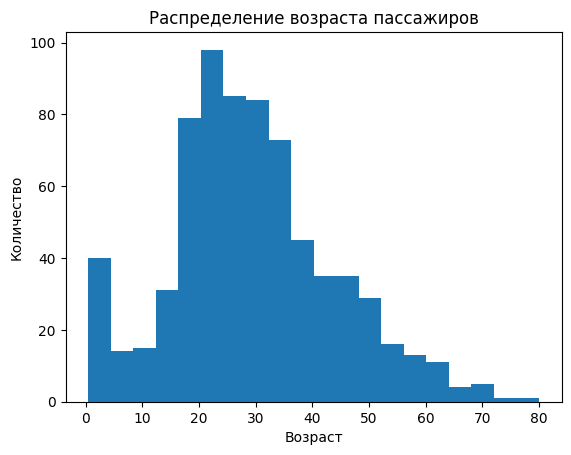

In [154]:
plt.hist(df['Age'].dropna(), bins=20)
plt.xlabel('Возраст')
plt.ylabel('Количество')
plt.title('Распределение возраста пассажиров')
plt.show()

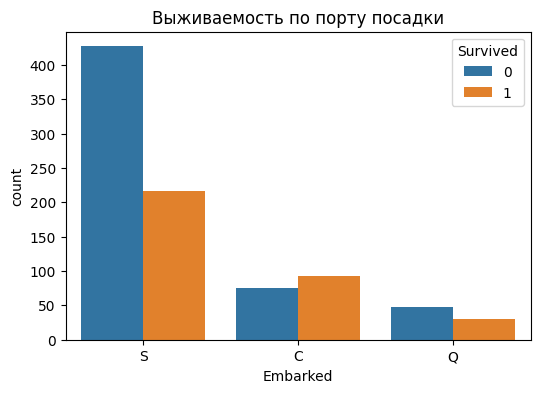

In [155]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Embarked', hue='Survived', data=df)
plt.title('Выживаемость по порту посадки')
plt.show()

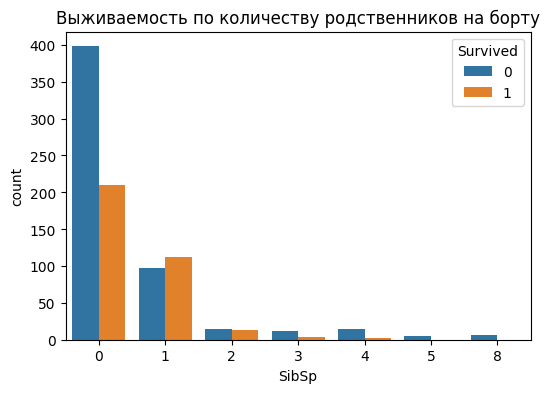

In [156]:
plt.figure(figsize=(6, 4))
sns.countplot(x='SibSp', hue='Survived', data=df)
plt.title('Выживаемость по количеству родственников на борту')
plt.show()

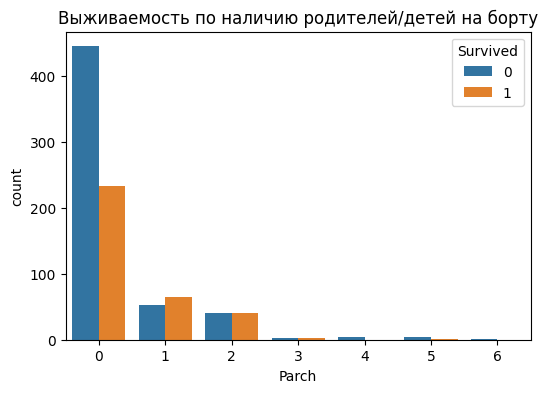

In [157]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Parch', hue='Survived', data=df)
plt.title('Выживаемость по наличию родителей/детей на борту')
plt.show()

In [158]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [305]:
def preprocess(data: pd.DataFrame):
    data['Age'] = data.groupby(['Sex', 'Pclass'])['Age'].transform(lambda x: x.fillna(x.mean()))
    data['Fare'] = df.groupby(['Pclass'])['Fare'].transform(lambda x: x.fillna(x.mean()))
    data['Title'] = data['Name'].apply(lambda x: re.search(' ([A-Za-z]+)\.', x).group(1))
    data['Fare']= data['Fare'].fillna(data['Fare'].mode()[0])
    data['Cabin']= data['Cabin'].fillna(data['Cabin'].mode()[0])
    data.drop('Name', axis = 1, inplace=True)
    data.drop('PassengerId', axis = 1, inplace = True)
    data.drop('Ticket', axis=1, inplace=True)
    
    label_encoder = LabelEncoder()
    data['Sex'] = label_encoder.fit_transform(data['Sex'])
    data['Embarked'] = label_encoder.fit_transform(data['Embarked'].astype(str))
    data['Title'] = label_encoder.fit_transform(data['Title'].astype(str))
    data['Cabin'] = label_encoder.fit_transform(data['Cabin'].astype(str))
    
    return data

In [334]:
def print_metrics(y_predicted):
    print(accuracy_score(y_predicted, y_test))
    print(classification_report(prediction, y_test))

In [306]:
df = preprocess(df)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
0,0,3,1,22.00,1,0,7.2500,47,2,12
1,1,1,0,38.00,1,0,71.2833,81,0,13
2,1,3,0,26.00,0,0,7.9250,47,2,9
3,1,1,0,35.00,1,0,53.1000,55,2,13
4,0,3,1,35.00,0,0,8.0500,47,2,12
...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.00,0,0,13.0000,47,2,15
887,1,1,0,19.00,0,0,30.0000,30,2,9
888,0,3,0,21.75,1,2,23.4500,47,2,9
889,1,1,1,26.00,0,0,30.0000,60,0,12


In [307]:
null_counts = df.isnull().sum()
null_counts

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Cabin       0
Embarked    0
Title       0
dtype: int64

In [308]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [309]:
y = df['Survived']
df.drop('Survived', axis=1, inplace=True)

In [310]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=42)

In [311]:
logreg = LogisticRegression(solver='liblinear', tol=1e-07, C=1.0, random_state=42)
logreg.fit(X_train, y_train)

LogisticRegression(random_state=42, solver='liblinear', tol=1e-07)

In [312]:
prediction = logreg.predict(X_test)

In [320]:
predict(logreg)

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Cabin       0
Embarked    0
Title       0
dtype: int64


In [315]:
print(classification_report(prediction, y_test))

              precision    recall  f1-score   support

           0       0.86      0.82      0.84       110
           1       0.73      0.78      0.76        69

    accuracy                           0.80       179
   macro avg       0.79      0.80      0.80       179
weighted avg       0.81      0.80      0.81       179



In [316]:
def predict(model):
    test = pd.read_csv('titanic/test.csv')
    passengerID = test['PassengerId']
    test = preprocess(test)
    null_counts = test.isnull().sum()
    print(null_counts)
    test_prediction = model.predict(test)
    output = pd.DataFrame({'PassengerId': passengerID, 'Survived': test_prediction})
    output.to_csv('submission.csv', index=False)

In [317]:
from sklearn.ensemble import BaggingClassifier

In [318]:
bagging_logreg = BaggingClassifier(logreg, n_estimators=20, random_state=42)
bagging_logreg.fit(X_train, y_train)

BaggingClassifier(estimator=LogisticRegression(random_state=42,
                                               solver='liblinear', tol=1e-07),
                  n_estimators=20, random_state=42)

In [319]:
accuracy = bagging_logreg.score(X_test, y_test)
accuracy

0.7988826815642458

In [301]:
predict(bagging_logreg)

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Cabin          0
Embarked       0
Title          0
dtype: int64


In [242]:
from sklearn.model_selection import cross_val_score

In [243]:
scores = cross_val_score(logreg, df, y, cv=5)
scores

array([0.81005587, 0.81460674, 0.78089888, 0.7752809 , 0.81460674])

In [223]:
param_grid = {
    'C': [0.1, 1.0, 10.0], 
    'solver': ['liblinear', 'lbfgs', 'newton-cholesky', 'newton-cg'], 
    'tol': [0.001, 0.00001, 0.0000001]
}

In [224]:
from sklearn.model_selection import GridSearchCV

In [226]:
grid_search = GridSearchCV(logreg, param_grid, cv=5)

In [227]:
grid_search.fit(df, y)

/usr/local/Caskroom/miniforge/base/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/Caskroom/miniforge/base/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linea

/usr/local/Caskroom/miniforge/base/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/Caskroom/miniforge/base/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linea

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42),
             param_grid={'C': [0.1, 1.0, 10.0],
                         'solver': ['liblinear', 'lbfgs', 'newton-cholesky',
                                    'newton-cg'],
                         'tol': [0.001, 1e-05, 1e-07]})

In [229]:
grid_search.best_params_

{'C': 1.0, 'solver': 'liblinear', 'tol': 1e-07}

In [230]:
grid_search.best_score_

0.7990898248697508

In [329]:
from sklearn.neighbors import KNeighborsClassifier

In [362]:
knn = KNeighborsClassifier(n_neighbors=10)

In [363]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [364]:
prediction = knn.predict(X_test)
prediction

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1])

In [365]:
print_metrics(prediction)

0.776536312849162
              precision    recall  f1-score   support

           0       0.93      0.75      0.83       131
           1       0.55      0.85      0.67        48

    accuracy                           0.78       179
   macro avg       0.74      0.80      0.75       179
weighted avg       0.83      0.78      0.79       179

